In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import os
import numpy as np
import pandas as pd

from skimage import data
from skimage import filters
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse
from skimage import transform

from scipy import stats

In [7]:
with open(os.path.join('..', 'data', 'train.csv'), 'rb') as csvfile:
    training_data = np.loadtxt(csvfile, delimiter=',')

In [8]:
# Get a base image
img = training_data[1, 9:439].reshape([33,13])

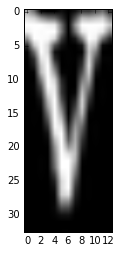

In [9]:
# Show image
imshow(img, cmap="gray")

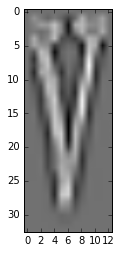

In [10]:
# Laplacian filter
imshow(filters.laplace(img), cmap="gray")

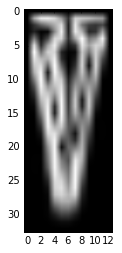

In [11]:
# Scharr filter
imshow(filters.scharr(img), cmap="gray")

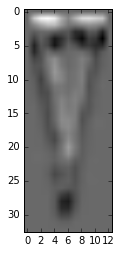

In [12]:
# Horizontal eges
imshow(filters.scharr_h(img), cmap="gray")

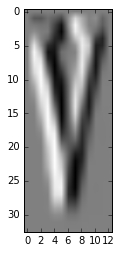

In [13]:
imshow(filters.scharr_v(img), cmap="gray")

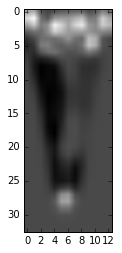

In [14]:
imshow(corner_harris(img), cmap="gray")

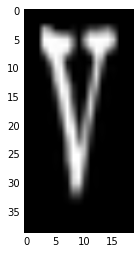

In [15]:
imshow(np.pad(img, 3, mode="minimum"), cmap="gray")

In [16]:
corner_peaks(corner_harris(img))

array([[ 1,  1],
       [ 1, 11],
       [ 2,  4],
       [ 2,  8],
       [ 5,  3],
       [ 5,  9],
       [28,  6]])

In [17]:
# Function to randomly distort image
def rand_distort(img):
    # Random distortion parameters
    shear = stats.truncnorm.rvs(-0.1, 0.1, scale = .15)
    rotation = stats.truncnorm.rvs(-0.05, 0.05, scale = 0.15)
    translation = (stats.randint.rvs(-3, 3), stats.randint.rvs(-2, 2))
    
    mu, sigma = 1, 0.25
    leftend, rightend = 0.9, 1.1
    
    # Arguments get a bit messy if generated value isn't centered around 0
    scale = (stats.truncnorm.rvs((leftend - mu)/sigma, (rightend - mu)/sigma, scale = sigma, loc = mu),
             stats.truncnorm.rvs((leftend - mu)/sigma, (rightend - mu)/sigma, scale = sigma, loc = mu))
    
    trns = transform.AffineTransform(shear=shear, rotation=rotation, translation=translation, scale=scale)
    return warp(img, trns)

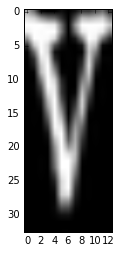

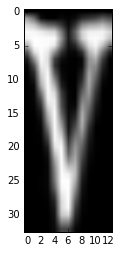

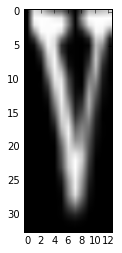

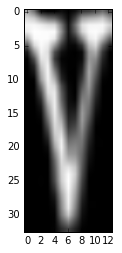

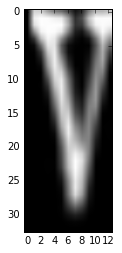

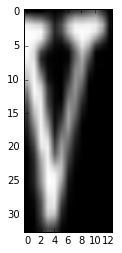

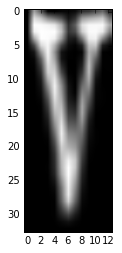

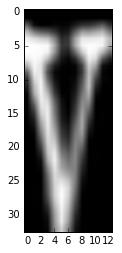

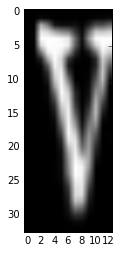

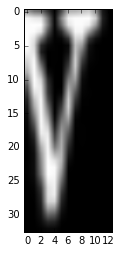

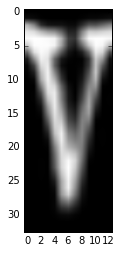

In [18]:
img = training_data[1, 9:439].reshape([33,13])

imshow(img, cmap="gray")
plt.show()

for i in range(10):
    imshow(rand_distort(img), cmap="gray")
    plt.show()